# __Plan for project__

1 - Introduction of the purpose of the project. What questions will be answered by the project. 

1.1 - Explain the dataset, what it is we are looking at. Windspeeds ?

1.2 - Link the source of the dataset csv file

2 - Data cleaning and exploration

3 - Data Visualisation. Use Skicit Learn and make them pretty. Use maybe seaborn as well.

4 - Analysis. Give meaningfull insights but keep it short. No fluffy writing. 

5 - Give an overall Summary of the Analysis.

Last - update ReadMe.md to be easy to read. Refer to last years for environment set up. 

Extra - figure out way to Use database? 

NOTE: Ref as you go 

Import libraries 

In [281]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Maybe use these later
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.tsa.arima.model import ARIMA

In [297]:
# Load datasets.

df = pd.read_csv("daily_data.csv")

In [318]:
df.head(15)

,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,wdsp,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
date,,,,,,,,,,,,,,,,,,,,,
2042-01-01,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,17.2,...,,0.0,0,,,1.1,1.4,,,
2042-01-02,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,15.2,...,,0.0,0,,,0.7,0.9,,,
2042-01-03,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,14.0,...,,0.1,0,,,0.5,0.6,,,
2042-01-04,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,17.0,...,,0.6,0,,,0.6,0.7,,,
2042-01-05,0,3.5,1,-0.8,0,0,0,0.6,1013.4,13.0,...,,3.4,0,,,0.6,0.7,,,
2042-01-06,0,5.1,0,0.7,1,-3.7,2,0.0,1021.1,9.7,...,,0.1,0,,,0.4,0.5,,,
2042-01-07,0,7.1,0,0.5,1,-1,3,0.0,1021.7,10.3,...,,4.0,0,,,0.2,0.2,,,
2042-01-08,0,7.1,0,1.4,0,0.2,3,0.0,1016.8,9.3,...,,3.7,0,,,0.2,0.2,,,
2042-01-09,0,4.5,0,0.7,0,0.9,0,0.2,1012.0,11.8,...,,0.6,0,,,0.5,0.7,,,


In [319]:
# clean data and load again in df.
df=pd.read_csv("daily_data.csv", skiprows=25, parse_dates=['date'], dayfirst=True, low_memory=False)

# check
df.head(5)

C:\Users\laura\AppData\Local\Temp\ipykernel_3028\2965395896.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv("daily_data.csv", skiprows=25, parse_dates=['date'], dayfirst=True, low_memory=False)


,date,ind,maxtp,ind.1,mintp,igmin,gmin,ind.2,rain,cbl,...,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd
0,2042-01-01,0,9.7,0,6.8,0,4.7,2,0.0,1020.3,...,,0.0,0,,,1.1,1.4,,,
1,2042-01-02,0,9.9,0,7.9,0,6.7,0,0.1,1016.2,...,,0.0,0,,,0.7,0.9,,,
2,2042-01-03,0,11.2,0,8.9,0,7.2,0,1.5,1006.8,...,,0.1,0,,,0.5,0.6,,,
3,2042-01-04,0,9.2,0,2.7,0,3.4,0,3.5,1001.5,...,,0.6,0,,,0.6,0.7,,,
4,2042-01-05,0,3.5,1,-0.8,0,0,0,0.6,1013.4,...,,3.4,0,,,0.6,0.7,,,


Look at filtering by date ranges next

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')  # day-month-2-digit year


In [ ]:
# Set date as index.

df.set_index('date', inplace=True)


In [ ]:
# inspect data

df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30650 entries, 2042-01-01 to 2025-11-30
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ind     30650 non-null  int64  
 1   maxtp   30650 non-null  float64
 2   ind.1   30650 non-null  int64  
 3   mintp   30650 non-null  float64
 4   igmin   30650 non-null  int64  
 5   gmin    30650 non-null  object 
 6   ind.2   30650 non-null  int64  
 7   rain    30650 non-null  float64
 8   cbl     30650 non-null  float64
 9   wdsp    30650 non-null  float64
 10  ind.3   30650 non-null  int64  
 11  hm      30650 non-null  object 
 12  ind.4   30650 non-null  int64  
 13  ddhm    30650 non-null  object 
 14  ind.5   30650 non-null  int64  
 15  hg      30650 non-null  object 
 16  sun     30650 non-null  float64
 17  dos     30650 non-null  object 
 18  g_rad   30650 non-null  object 
 19  soil    30650 non-null  object 
 20  pe      30650 non-null  float64
 21  evap    30650 non-

In [ ]:
# inspect data statistics

df.describe()

,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,ind.3,ind.4,ind.5,sun,pe
count,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000,30650.000000
mean,0.001077,13.088170,0.083393,6.168000,0.217879,0.885057,2.074085,1003.490049,10.171263,0.030114,0.030375,0.029918,4.020016,1.507468
std,0.033776,4.910605,0.276598,4.384983,0.416353,1.232268,4.393867,11.732436,4.585331,0.174307,0.174636,0.173214,3.764428,1.003237
min,0.000000,-4.700000,0.000000,-12.200000,0.000000,0.000000,0.000000,949.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.500000,0.000000,2.900000,0.000000,0.000000,0.000000,996.200000,6.800000,0.000000,0.000000,0.000000,0.500000,0.700000
50%,0.000000,13.000000,0.000000,6.300000,0.000000,0.000000,0.200000,1004.500000,9.500000,0.000000,0.000000,0.000000,3.200000,1.300000
75%,0.000000,16.900000,0.000000,9.600000,0.000000,2.000000,2.200000,1011.700000,13.000000,0.000000,0.000000,0.000000,6.500000,2.200000
max,2.000000,29.100000,2.000000,18.400000,4.000000,4.000000,92.600000,1037.400000,35.500000,2.000000,2.000000,2.000000,15.900000,5.700000


In [ ]:
# plot filtered years of wind speed data
plt.figure(figsize=(12,5))
df['wdsp'].loc['2010':'2020'].plot()
plt.title('Wind Speed Over Time (2010-2020)')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

<Figure size 1200x500 with 0 Axes>

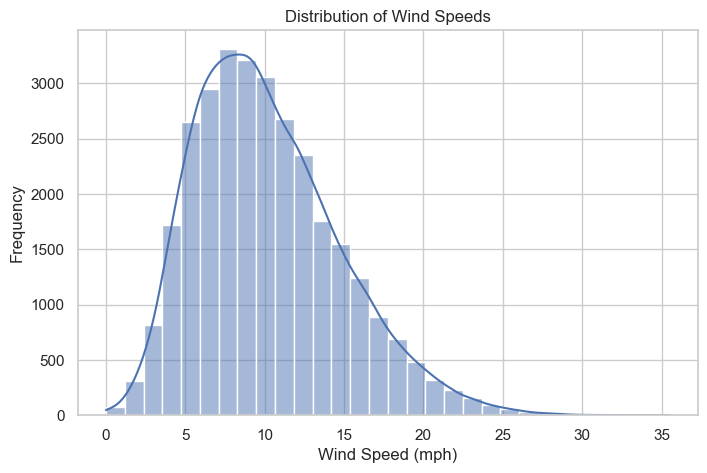

In [ ]:
# Histogram of wind speeds ( 'wdsp' column)

plt.figure(figsize=(8,5))
sns.histplot(df['wdsp'], bins=30, kde=True)
plt.title('Distribution of Wind Speeds')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

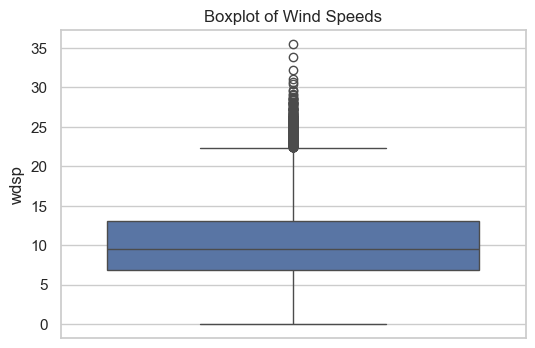

In [ ]:
# Boxplot to detect outliers
plt.figure(figsize=(6,4))
sns.boxplot(y=df['wdsp'])
plt.title('Boxplot of Wind Speeds')
plt.show()


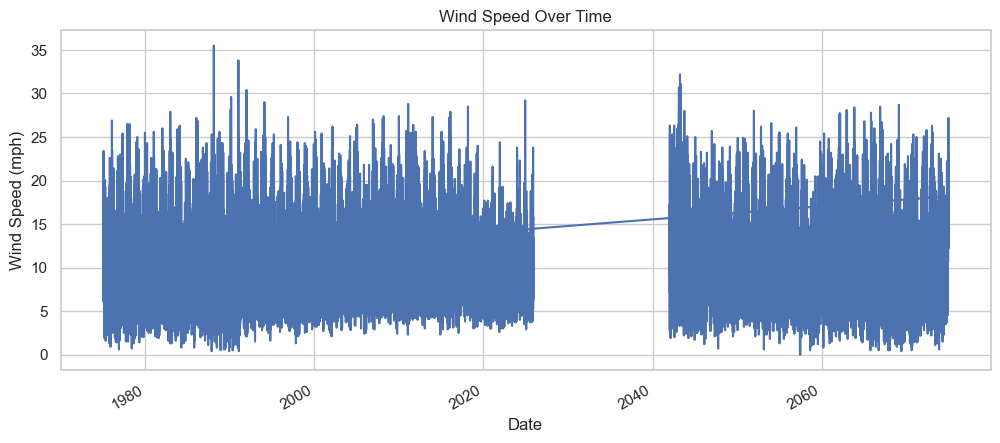

In [ ]:
#  Raw wind speed time series
plt.figure(figsize=(12,5))
df['wdsp'].plot()
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.show()

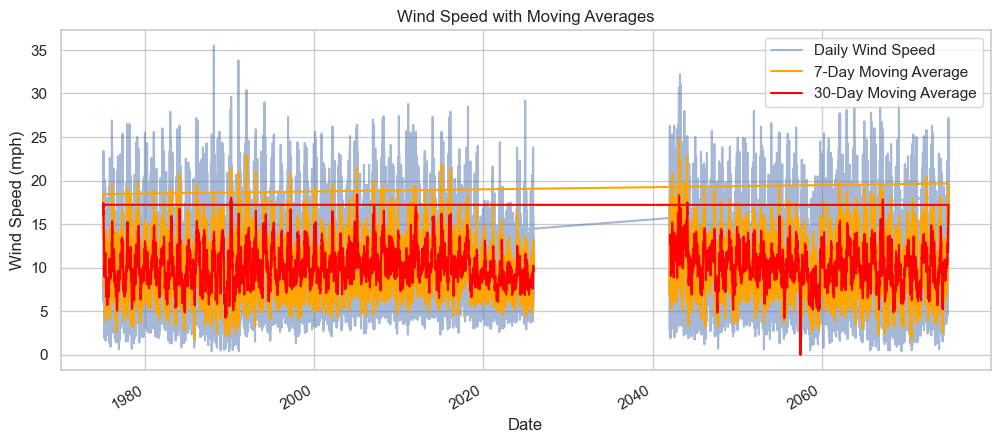

In [ ]:
# b) Rolling averages (7-day and 30-day)
df['7d_avg'] = df['wdsp'].rolling(window=7).mean()
df['30d_avg'] = df['wdsp'].rolling(window=30).mean()
plt.figure(figsize=(12,5))
df['wdsp'].plot(label='Daily Wind Speed', alpha=0.5)
df['7d_avg'].plot(label='7-Day Moving Average', color='orange')
df['30d_avg'].plot(label='30-Day Moving Average', color='red')
plt.title('Wind Speed with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Wind Speed (mph)')
plt.legend()
plt.show()

Start of analysis from draft 1 

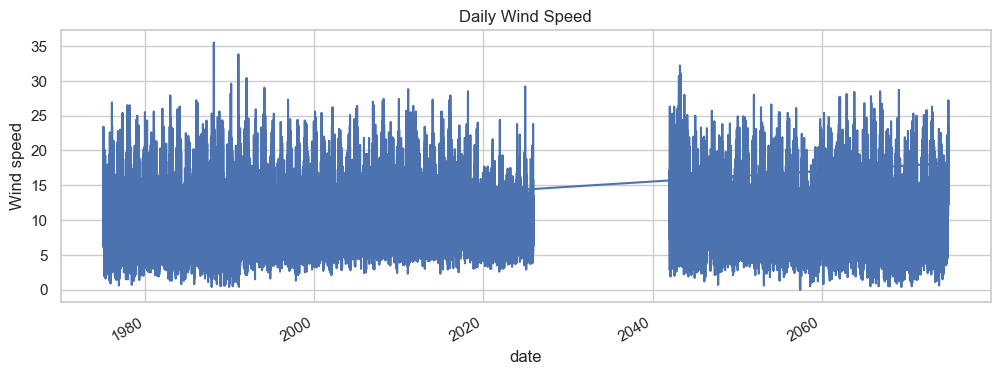

In [ ]:
# plot wind speed ('wdsp' column)
df['wdsp'].plot(figsize=(12,4), title="Daily Wind Speed")
plt.ylabel('Wind speed')
plt.show()


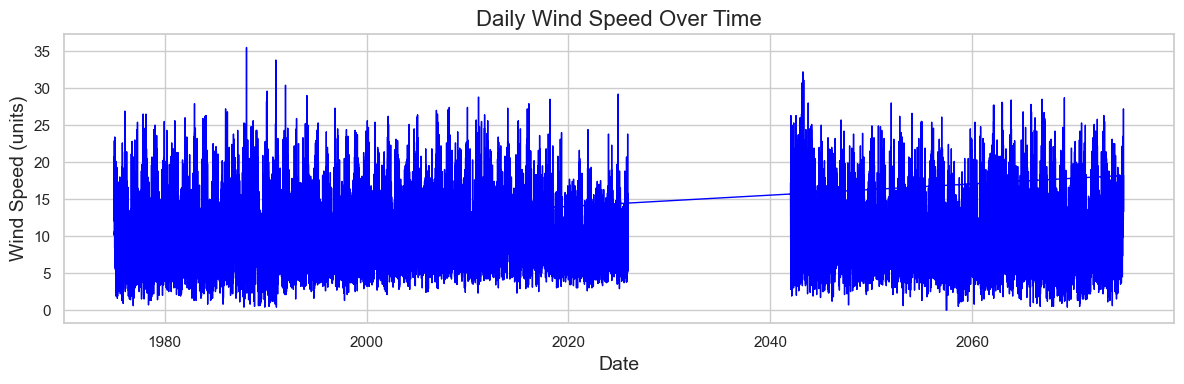

In [ ]:
# lets try make this prettier with some custimisation. 
plt.figure(figsize=(12,4))
plt.plot(df.index, df['wdsp'], color='blue', linewidth=1)  
plt.title("Daily Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

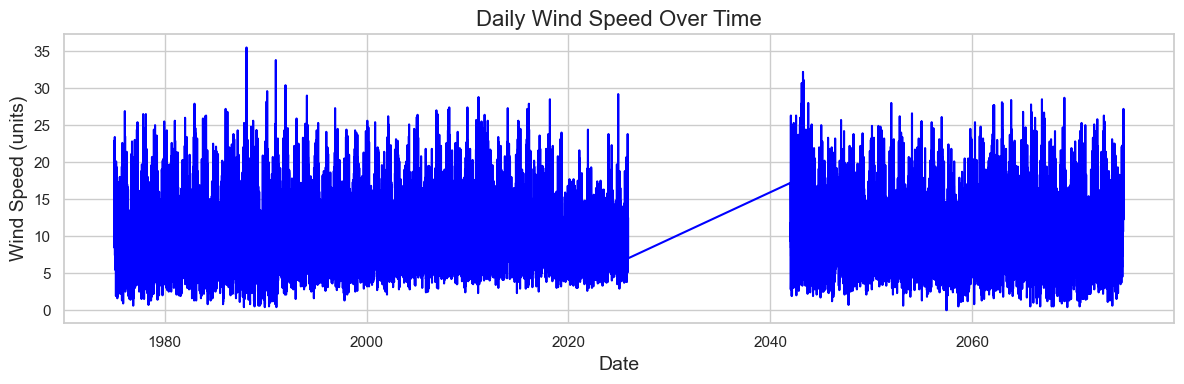

In [ ]:
# ok lets look at using seaborn for better visualisation.
import seaborn as sns
sns.set(style="whitegrid")
plt.figure(figsize=(12,4))
sns.lineplot(x=df.index, y='wdsp', data=df, color='blue')
plt.title("Daily Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

not much difference with seaborn and plt but can play around some more.

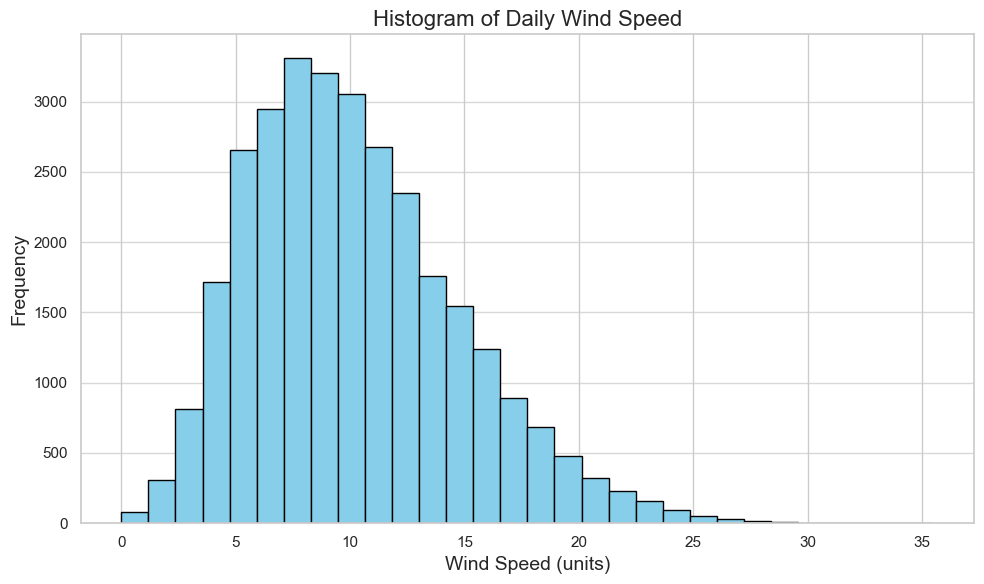

In [ ]:
# ok lets try a histogram now.
plt.figure(figsize=(10,6)) 
plt.hist(df['wdsp'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Daily Wind Speed", fontsize=16)
plt.xlabel("Wind Speed (units)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

not sure a histogram will be best graph her for insights. Come back to this

In [ ]:
# ok lets look at some stats now.
df['wdsp'].describe()  

count    30650.000000
mean        10.171263
std          4.585331
min          0.000000
25%          6.800000
50%          9.500000
75%         13.000000
max         35.500000
Name: wdsp, dtype: float64

Plot the daily mean of the data set.

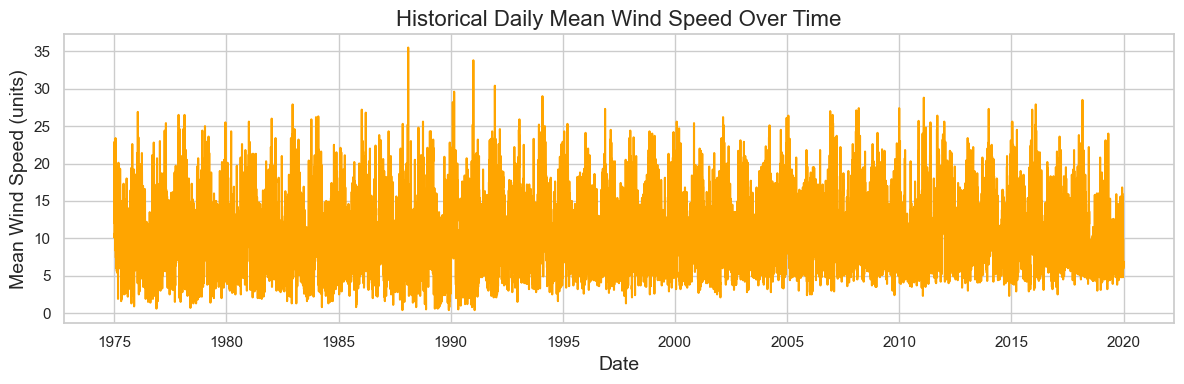

In [ ]:
# plot daily mean of only historical data, no projections
historical_df = df[df.index < '2020-01-01']
plt.figure(figsize=(12,4)) 
sns.lineplot(x=historical_df.index, y='wdsp', data=historical_df, color='orange')
plt.title("Historical Daily Mean Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Mean Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

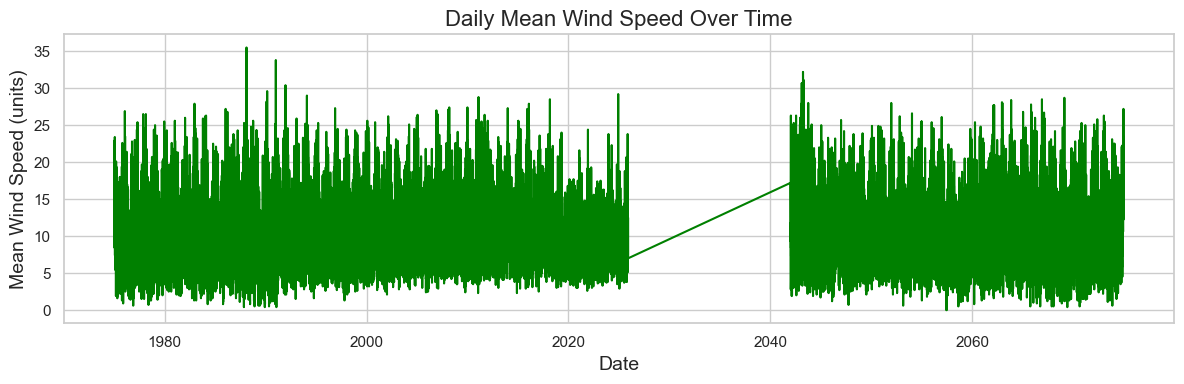

In [ ]:
# plot the daily mean wind speed over time using seaborn
plt.figure(figsize=(12,4))
sns.lineplot(x=df.index, y='wdsp', data=df, color='green')
plt.title("Daily Mean Wind Speed Over Time", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Mean Wind Speed (units)", fontsize=14)
plt.tight_layout()
plt.show()

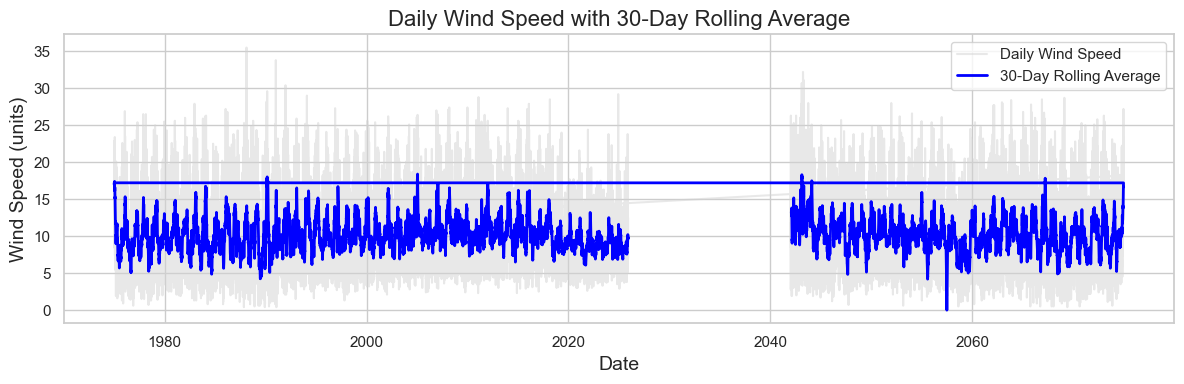

In [ ]:
# time to plot some rolling averages.
rolling_window = 30  # 30-day rolling average
df['wdsp_rolling'] = df['wdsp'].rolling(window=rolling_window).mean()  
plt.figure(figsize=(12,4))
plt.plot(df.index, df['wdsp'], color='lightgray', alpha=0.5, label='Daily Wind Speed')
plt.plot(df.index, df['wdsp_rolling'], color='blue', linewidth=2, label='30-Day Rolling Average')
plt.title("Daily Wind Speed with 30-Day Rolling Average", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Wind Speed (units)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# plot the high wind speed days looking at the max wind speed

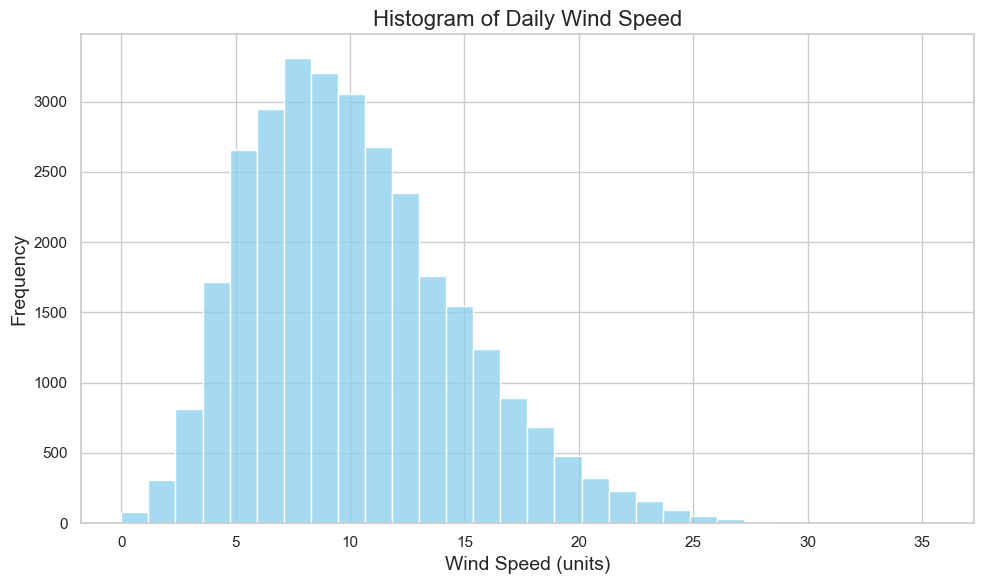

In [ ]:
# plot histogram of wind speed with seaborn
plt.figure(figsize=(10,6))
sns.histplot(df['wdsp'].dropna(), bins=30, color='skyblue', kde=False)
plt.title("Histogram of Daily Wind Speed", fontsize=16)
plt.xlabel("Wind Speed (units)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# look at filtering data for high wind speeds
high_wind_threshold = 20  # define high wind speed threshold
high_wind_days = df[df['wdsp'] > high_wind_threshold]
high_wind_days
high_wind_days.describe()


,ind,maxtp,ind.1,mintp,igmin,ind.2,rain,cbl,wdsp,ind.3,ind.4,ind.5,sun,pe,7d_avg,30d_avg,wdsp_rolling
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,947.000000,947.000000
mean,0.003158,10.557263,0.036842,4.992526,0.152632,0.210526,3.880632,992.742526,22.387579,0.095789,0.095789,0.095789,2.729368,1.219368,14.552105,12.322429,12.322429
std,0.056136,3.592752,0.188473,3.294229,0.368502,0.632701,5.847455,12.068900,2.107719,0.294457,0.294457,0.294457,2.903907,0.628313,2.963495,2.221361,2.221361
min,0.000000,-1.300000,0.000000,-5.100000,0.000000,0.000000,0.000000,953.000000,20.100000,0.000000,0.000000,0.000000,0.000000,0.100000,5.914286,5.766667,5.766667
25%,0.000000,8.400000,0.000000,2.400000,0.000000,0.000000,0.500000,985.350000,20.800000,0.000000,0.000000,0.000000,0.100000,0.800000,12.271429,10.753333,10.753333
50%,0.000000,11.000000,0.000000,4.900000,0.000000,0.000000,2.100000,993.800000,21.800000,0.000000,0.000000,0.000000,1.900000,1.100000,14.628571,12.256667,12.256667
75%,0.000000,12.875000,0.000000,7.300000,0.000000,0.000000,4.700000,1001.175000,23.400000,0.000000,0.000000,0.000000,4.600000,1.500000,16.682143,13.823333,13.823333
max,1.000000,22.000000,1.000000,15.700000,3.000000,4.000000,60.200000,1021.000000,35.500000,1.000000,1.000000,1.000000,12.700000,4.000000,24.714286,18.393333,18.393333


# END of Draft 1 

# Start of Draft 2 layout

What kind of analysis we doing?????

1  Basic Analysis - stuff from last year 

Summary statistics: mean, median, min, max, standard deviation of wind speeds. Etc etc et c 

Distribution plots:

Histogram to see the distribution of wind speeds.

Density plot (KDE) for a smoother view.

Boxplots: Identify outliers or unusual wind speed events.

Frequency of strong winds: Count number of times wind exceeds thresholds (e.g., 20 mph).

2  Time Analysis so rolling averages maybe?

Time series plot: Plot wind speed over time to see trends.

Rolling averages / smoothing:

Daily, weekly, or hourly rolling averages to smooth short-term fluctuations.

Rolling standard deviation can indicate periods of high variability.

Seasonal decomposition: Identify trends, seasonality, and residuals we have long term data starting 1980?? Maybe double check

Peak analysis: Identify maximum wind events per day, week, or month. This would be good for airport to plan flights

3 Pattern Analysis

Diurnal patterns: How wind speed varies over hours of the day. ??? Maybe 

Seasonal patterns: Compare wind speeds across months or seasons. Extra if there is time 


4  Correlation and External Factors - this will be extra if there is time

Compare wind speed with other variables if available:

Temperature, pressure, humidity....

Weather events (storms, fronts). - could be useful??

Correlation plots (scatter plots, heatmaps).

5  Predictive/Forecasting Approaches - 

Time series forecasting:

ARIMA, SARIMA, Prophet for trend and seasonality.

Rolling-window predictions for short-term forecasts.

Extreme wind events prediction: Use thresholds to forecast probability of strong wind events.

6. Advanced Visualizations - i like sound of heatmaps but unsure of wind rose charts will see how they look

Wind rose charts: Direction and speed distribution.

Heatmaps: Wind speed by time of day vs. month/season.


Rolling averages are great to reveal longer-term trends, but you can also calculate rolling maximums to highlight peak wind events, which are critical for airports.